 #  A Whale off the Port(folio)
 ---

 In this assignment, you'll get to use what you've learned this week to evaluate the performance among various algorithmic, hedge, and mutual fund portfolios and compare them against the S&P TSX 60 Index.

In [1]:
# Initial imports
import pandas as pd
import numpy as np
import datetime as dt
import seaborn as sns
from pathlib import Path

%matplotlib inline

# Data Cleaning

In this section, you will need to read the CSV files into DataFrames and perform any necessary data cleaning steps. After cleaning, combine all DataFrames into a single DataFrame.

Files:

* `whale_returns.csv`: Contains returns of some famous "whale" investors' portfolios.

* `algo_returns.csv`: Contains returns from the in-house trading algorithms from Harold's company.

* `sp_tsx_history.csv`: Contains historical closing prices of the S&P TSX 60 Index.

## Whale Returns

Read the Whale Portfolio daily returns and clean the data.

In [2]:
# Path for Whale Returns
whalereturncsv = Path("c:/Users/Aakshay Gautam/Desktop/Homework/Module4/Starter_Code/Resources/whale_returns.csv")

In [3]:
# Reading whale returns
whale_df = pd.read_csv(whalereturncsv, index_col='Date', infer_datetime_format=True, parse_dates=True)
whale_df.head()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC
Date,,,,
2015-03-02,NaN,NaN,NaN,NaN
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569
2015-03-04,0.002230,0.003241,-0.002534,0.004213
2015-03-05,0.004016,0.004076,0.002355,0.006726
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098


In [4]:
# Sorting
whale_df = whale_df.sort_index()
whale_df.head()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC
Date,,,,
2015-03-02,NaN,NaN,NaN,NaN
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569
2015-03-04,0.002230,0.003241,-0.002534,0.004213
2015-03-05,0.004016,0.004076,0.002355,0.006726
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098


In [5]:
# Count nulls
whale_df.isnull().sum()

SOROS FUND MANAGEMENT LLC      1
PAULSON & CO.INC.              1
TIGER GLOBAL MANAGEMENT LLC    1
BERKSHIRE HATHAWAY INC         1
dtype: int64

In [6]:
# Drop nulls
whale_df = whale_df.dropna()
whale_df.head()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC
Date,,,,
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569
2015-03-04,0.002230,0.003241,-0.002534,0.004213
2015-03-05,0.004016,0.004076,0.002355,0.006726
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098
2015-03-09,0.000582,0.004225,0.005843,-0.001652


In [7]:
# Check again for nulls
whale_df.isnull().sum()

SOROS FUND MANAGEMENT LLC      0
PAULSON & CO.INC.              0
TIGER GLOBAL MANAGEMENT LLC    0
BERKSHIRE HATHAWAY INC         0
dtype: int64

## Algorithmic Daily Returns

Read the algorithmic daily returns and clean the data.

In [8]:
# Path for Algo Daily Returns
algodailypath = Path("c:/Users/Aakshay Gautam/Desktop/Homework/Module4/Starter_Code/Resources/algo_returns.csv")

In [9]:
# Reading algorithmic returns
algo_df = pd.read_csv(algodailypath, index_col='Date', infer_datetime_format=True, parse_dates=True)
algo_df.head()

,Algo 1,Algo 2
Date,,
2014-05-28,0.001745,NaN
2014-05-29,0.003978,NaN
2014-05-30,0.004464,NaN
2014-06-02,0.005692,NaN
2014-06-03,0.005292,NaN


In [10]:
# Sorting
algo_df = algo_df.sort_index()
algo_df.head()

,Algo 1,Algo 2
Date,,
2014-05-28,0.001745,NaN
2014-05-29,0.003978,NaN
2014-05-30,0.004464,NaN
2014-06-02,0.005692,NaN
2014-06-03,0.005292,NaN


In [11]:
# Count nulls
algo_df.isnull().sum()

Algo 1    0
Algo 2    6
dtype: int64

In [12]:
# Drop nulls
algo_df = algo_df.dropna()
algo_df.head()

,Algo 1,Algo 2
Date,,
2014-06-05,0.004062,0.013285
2014-06-06,0.001857,0.008284
2014-06-09,-0.005012,0.005668
2014-06-10,0.004406,-0.000735
2014-06-11,0.004760,-0.003761


In [13]:
# Check again for nulls
algo_df.isnull().sum()

Algo 1    0
Algo 2    0
dtype: int64

## S&P TSX 60 Returns

Read the S&P TSX 60 historic closing prices and create a new daily returns DataFrame from the data. 

In [14]:
# Path for S&P TSX 60 Returns 
spcsv = Path("c:/Users/Aakshay Gautam/Desktop/Homework/Module4/Starter_Code/Resources/sp_tsx_history.csv")

In [15]:
# Reading S&P TSX 60 Closing Prices
sp_tsx_df = pd.read_csv(spcsv, index_col='Date', infer_datetime_format=True, parse_dates=True)
sp_tsx_df.head()

,Close
Date,
2012-10-01,"$12,370.19"
2012-10-02,"$12,391.23"
2012-10-03,"$12,359.47"
2012-10-04,"$12,447.68"
2012-10-05,"$12,418.99"


In [16]:
# Check Data Types
sp_tsx_df.dtypes

Close    object
dtype: object

In [17]:
# Removing "$" , ","
sp_tsx_df["Close"] = sp_tsx_df["Close"].str.replace("$", "")
sp_tsx_df["Close"] = sp_tsx_df["Close"].str.replace(",", "")

C:\Users\Aakshay Gautam\anaconda3\envs\dev\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  


In [18]:
# Fix Data Types
sp_tsx_df["Close"] = sp_tsx_df["Close"].astype('float')
sp_tsx_df.head()

,Close
Date,
2012-10-01,12370.19
2012-10-02,12391.23
2012-10-03,12359.47
2012-10-04,12447.68
2012-10-05,12418.99


In [19]:
# Calculate Daily Returns
sp_tsx_daily = sp_tsx_df.pct_change()
sp_tsx_daily.head()

,Close
Date,
2012-10-01,NaN
2012-10-02,0.001701
2012-10-03,-0.002563
2012-10-04,0.007137
2012-10-05,-0.002305


In [20]:
# Count Nulls
sp_tsx_daily.isnull().sum()

Close    1
dtype: int64

In [21]:
# Drop nulls
sp_tsx_daily = sp_tsx_daily.dropna()
sp_tsx_daily.head()

,Close
Date,
2012-10-02,0.001701
2012-10-03,-0.002563
2012-10-04,0.007137
2012-10-05,-0.002305
2012-10-09,-0.011709


In [22]:
# Check again for nulls
sp_tsx_daily.isnull().sum()

Close    0
dtype: int64

In [23]:
# Rename `Close` Column to be specific to this portfolio.
sp_tsx_daily.columns = ['S&P TSX']
sp_tsx_daily.head()

,S&P TSX
Date,
2012-10-02,0.001701
2012-10-03,-0.002563
2012-10-04,0.007137
2012-10-05,-0.002305
2012-10-09,-0.011709


## Combine Whale, Algorithmic, and S&P TSX 60 Returns

In [24]:
# Join Whale Returns, Algorithmic Returns, and the S&P TSX 60 Returns into a single DataFrame with columns for each portfolio's returns.
total_df = pd.concat([whale_df, algo_df, sp_tsx_daily], axis='columns', join='inner')
total_df.head()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,S&P TSX
Date,,,,,,,
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569,-0.001942,-0.000949,-0.008530
2015-03-04,0.002230,0.003241,-0.002534,0.004213,-0.008589,0.002416,-0.003371
2015-03-05,0.004016,0.004076,0.002355,0.006726,-0.000955,0.004323,0.001344
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098,-0.004957,-0.011460,-0.009972
2015-03-09,0.000582,0.004225,0.005843,-0.001652,-0.005447,0.001303,-0.006555


In [25]:
# Sorting
total_df = total_df.sort_index()
total_df.head()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,S&P TSX
Date,,,,,,,
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569,-0.001942,-0.000949,-0.008530
2015-03-04,0.002230,0.003241,-0.002534,0.004213,-0.008589,0.002416,-0.003371
2015-03-05,0.004016,0.004076,0.002355,0.006726,-0.000955,0.004323,0.001344
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098,-0.004957,-0.011460,-0.009972
2015-03-09,0.000582,0.004225,0.005843,-0.001652,-0.005447,0.001303,-0.006555


---

# Conduct Quantitative Analysis

In this section, you will calculate and visualize performance and risk metrics for the portfolios.

## Performance Anlysis

#### Calculate and Plot the daily returns.

<AxesSubplot:xlabel='Date'>

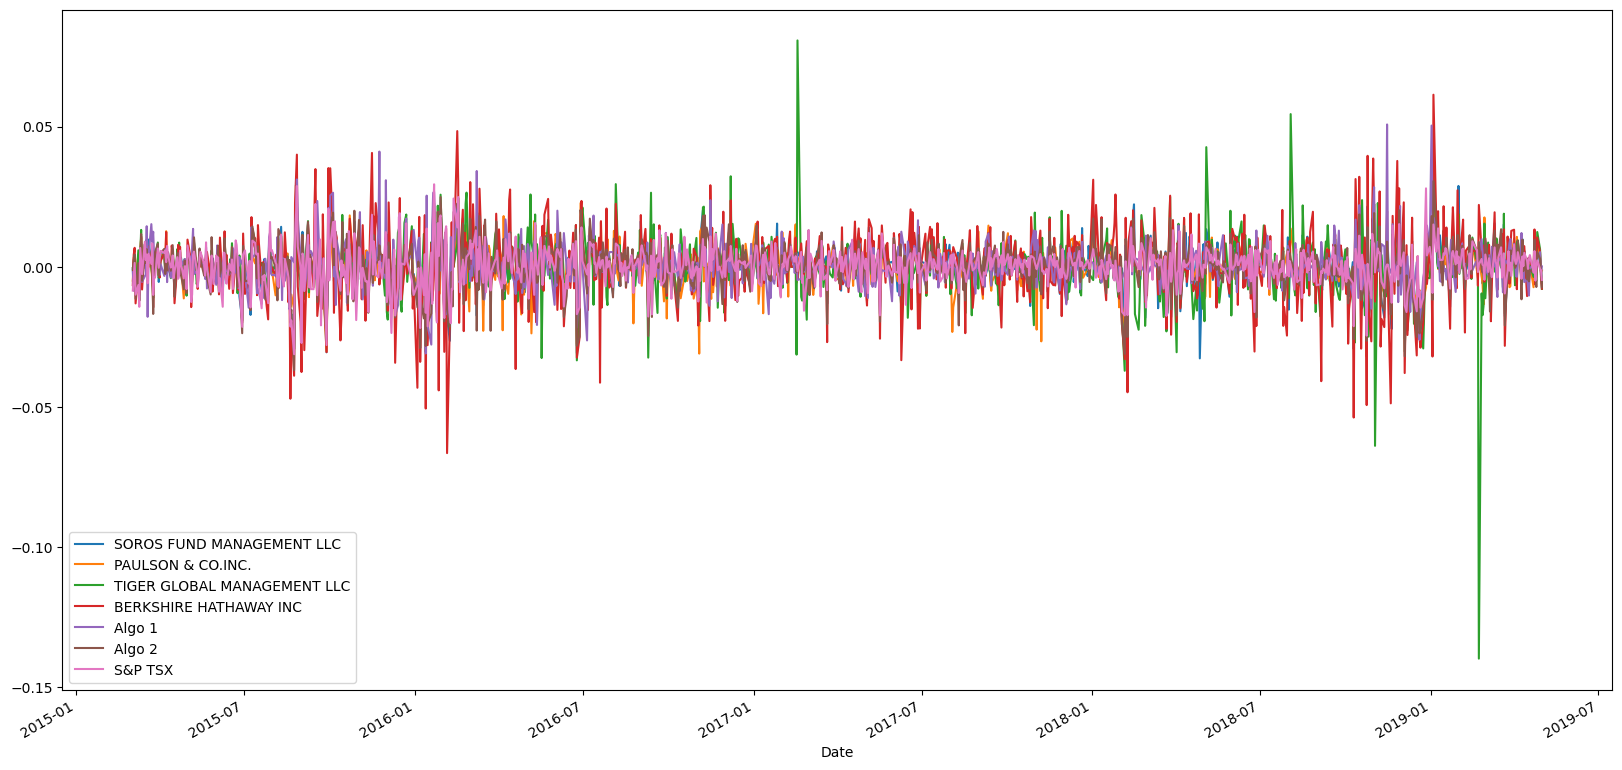

In [26]:
# Plot daily returns of all portfolios
total_df.plot(figsize=(20,10))

#### Calculate and Plot cumulative returns.

<AxesSubplot:xlabel='Date'>

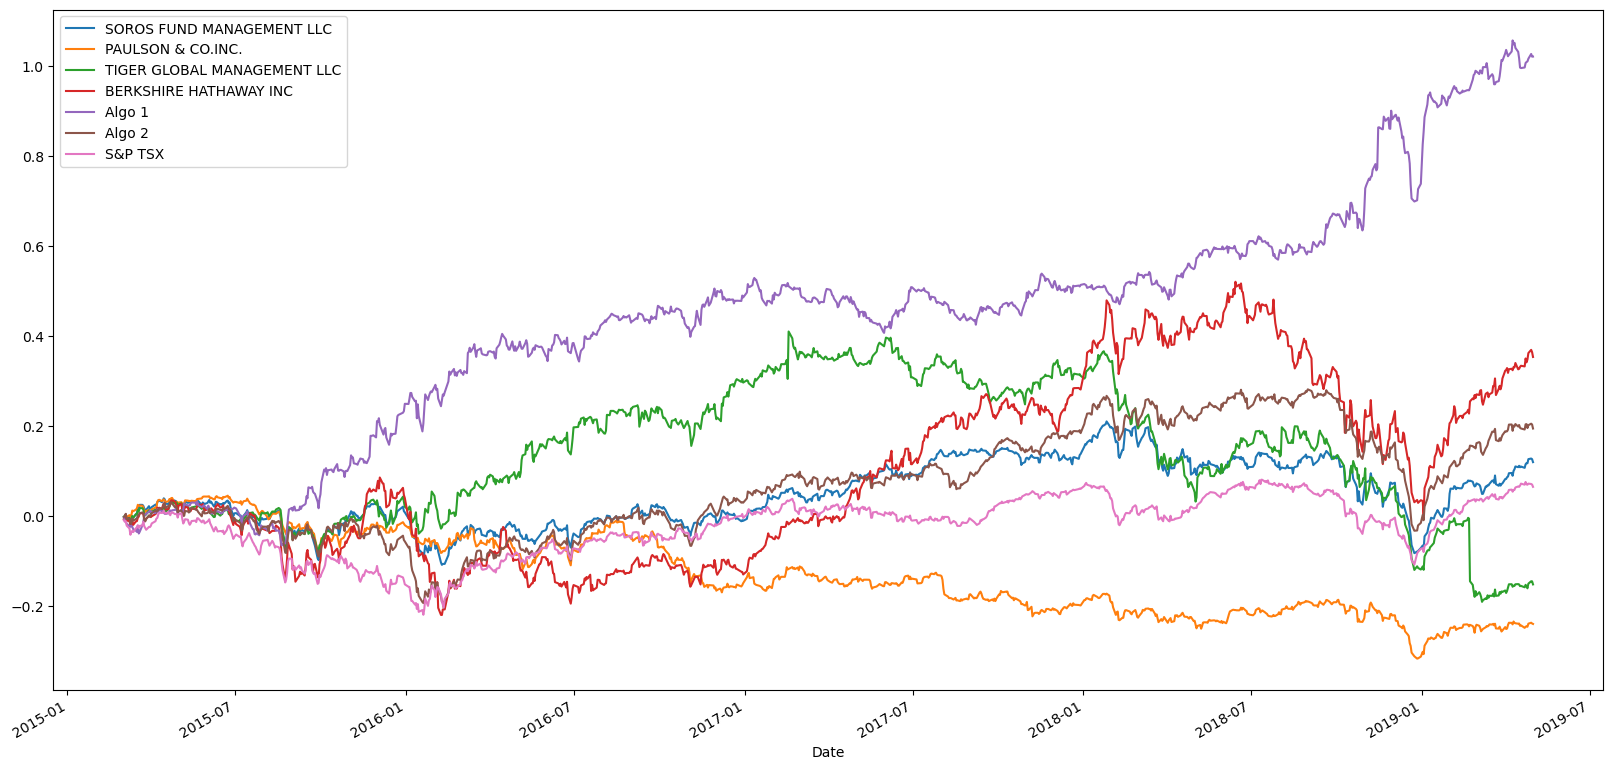

In [27]:
# Calculate cumulative returns of all portfolios
total_cumulative = (1 + total_df).cumprod() -1

# Plot cumulative returns
total_cumulative.plot(figsize=(20,10))

---

## Risk Analysis

Determine the _risk_ of each portfolio:

1. Create a box plot for each portfolio. 
2. Calculate the standard deviation for all portfolios.
4. Determine which portfolios are riskier than the S&P TSX 60.
5. Calculate the Annualized Standard Deviation.

### Create a box plot for each portfolio


<AxesSubplot:>

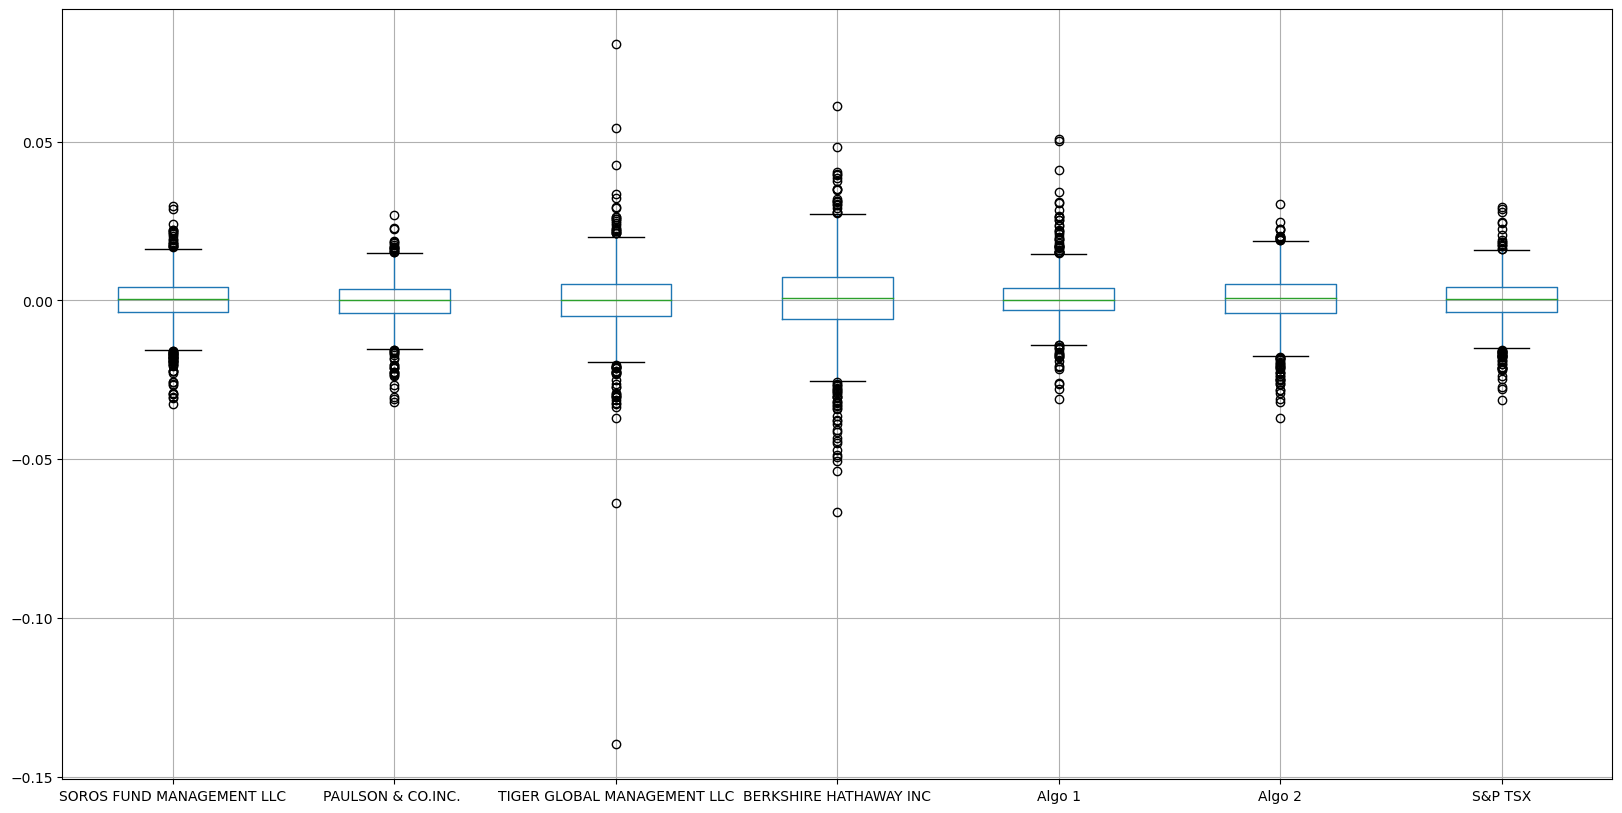

In [28]:
# Box plot to visually show risk
total_df.boxplot(figsize=(20,10))

### Calculate Standard Deviations

In [29]:
# Calculate the daily standard deviations of all portfolios
total_std = total_df.std().sort_values(ascending = True)
print(f"Standard Deviation of each Portfolio:): \n{total_std}")

Standard Deviation of each Portfolio:): 
PAULSON & CO.INC.              0.006982
S&P TSX                        0.007034
Algo 1                         0.007589
SOROS FUND MANAGEMENT LLC      0.007828
Algo 2                         0.008326
TIGER GLOBAL MANAGEMENT LLC    0.010883
BERKSHIRE HATHAWAY INC         0.012826
dtype: float64


### Determine which portfolios are riskier than the S&P TSX 60

In [30]:
# Calculate  the daily standard deviation of S&P TSX 60
sptsx_std = total_df['S&P TSX'].std()
print(f'Standard Deviation of S&P TSX 60: {sptsx_std}')

# Determine which portfolios are riskier than the S&P TSX 60
risky_port = total_std[total_std > sptsx_std]
print(f'The following portfolios are more risky than S&P TSX 60:\n{risky_port}')

Standard Deviation of S&P TSX 60: 0.007034167748577725
The following portfolios are more risky than S&P TSX 60:
Algo 1                         0.007589
SOROS FUND MANAGEMENT LLC      0.007828
Algo 2                         0.008326
TIGER GLOBAL MANAGEMENT LLC    0.010883
BERKSHIRE HATHAWAY INC         0.012826
dtype: float64


### Calculate the Annualized Standard Deviation

In [31]:
# Calculate the annualized standard deviation (252 trading days)
annual_std = total_std * np.sqrt(252)
print(f"Annualized Standard Deviation for each Portfolio: \n{annual_std}")

Annualized Standard Deviation for each Portfolio: 
PAULSON & CO.INC.              0.110841
S&P TSX                        0.111664
Algo 1                         0.120470
SOROS FUND MANAGEMENT LLC      0.124259
Algo 2                         0.132177
TIGER GLOBAL MANAGEMENT LLC    0.172759
BERKSHIRE HATHAWAY INC         0.203599
dtype: float64


---

## Rolling Statistics

Risk changes over time. Analyze the rolling statistics for Risk and Beta. 

1. Calculate and plot the rolling standard deviation for all portfolios using a 21-day window.
2. Calculate the correlation between each stock to determine which portfolios may mimick the S&P TSX 60.
3. Choose one portfolio, then calculate and plot the 60-day rolling beta for it and the S&P TSX 60.

### Calculate and plot rolling `std` for all portfolios with 21-day window

<AxesSubplot:xlabel='Date'>

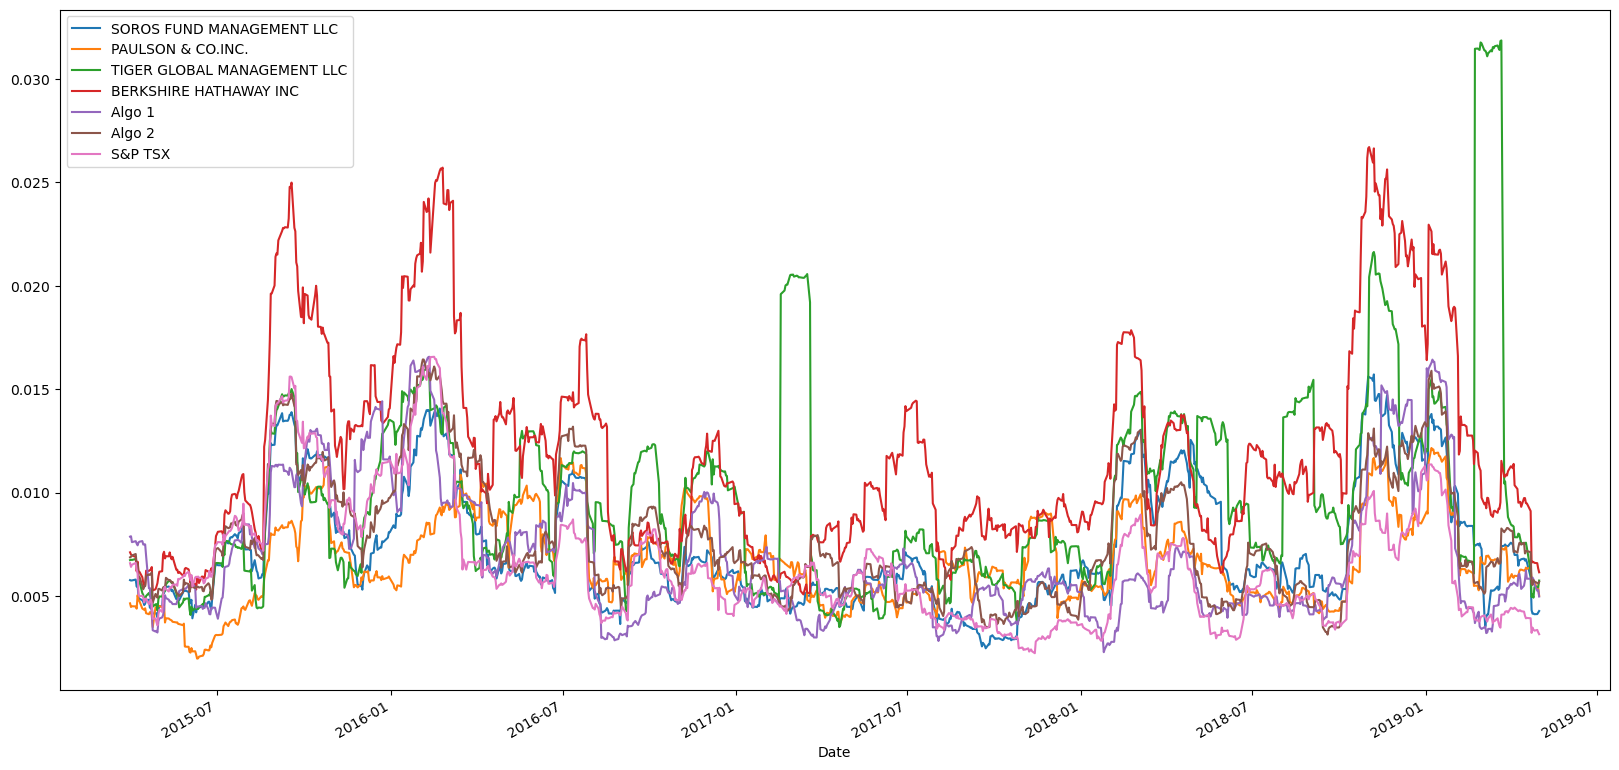

In [32]:
# Calculate the rolling standard deviation for all portfolios using a 21-day window
rolling_std = total_df.rolling(window=21).std()

# Plot the rolling standard deviation
rolling_std.plot(figsize=(20,10))

### Calculate and plot the correlation

In [33]:
# Calculate the correlation
correlation = total_df.corr()

# Display de correlation matrix
correlation 

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,S&P TSX
SOROS FUND MANAGEMENT LLC,1.000000,0.697076,0.560964,0.750181,0.313795,0.826667,0.673930
PAULSON & CO.INC.,0.697076,1.000000,0.433034,0.540033,0.266363,0.674015,0.486511
TIGER GLOBAL MANAGEMENT LLC,0.560964,0.433034,1.000000,0.423524,0.161236,0.506689,0.440583
BERKSHIRE HATHAWAY INC,0.750181,0.540033,0.423524,1.000000,0.289378,0.684609,0.557250
Algo 1,0.313795,0.266363,0.161236,0.289378,1.000000,0.285455,0.310276
Algo 2,0.826667,0.674015,0.506689,0.684609,0.285455,1.000000,0.737370
S&P TSX,0.673930,0.486511,0.440583,0.557250,0.310276,0.737370,1.000000


<AxesSubplot:>

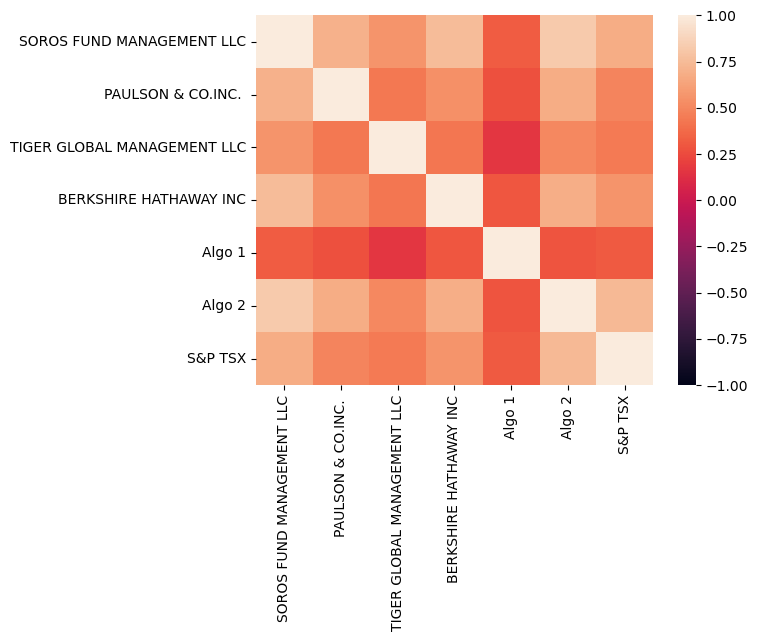

In [34]:
# Correlation Matrix Plotting
sns.heatmap(correlation, vmin =-1, vmax=1)

### Calculate and Plot Beta for a chosen portfolio and the S&P 60 TSX

<AxesSubplot:xlabel='Date'>

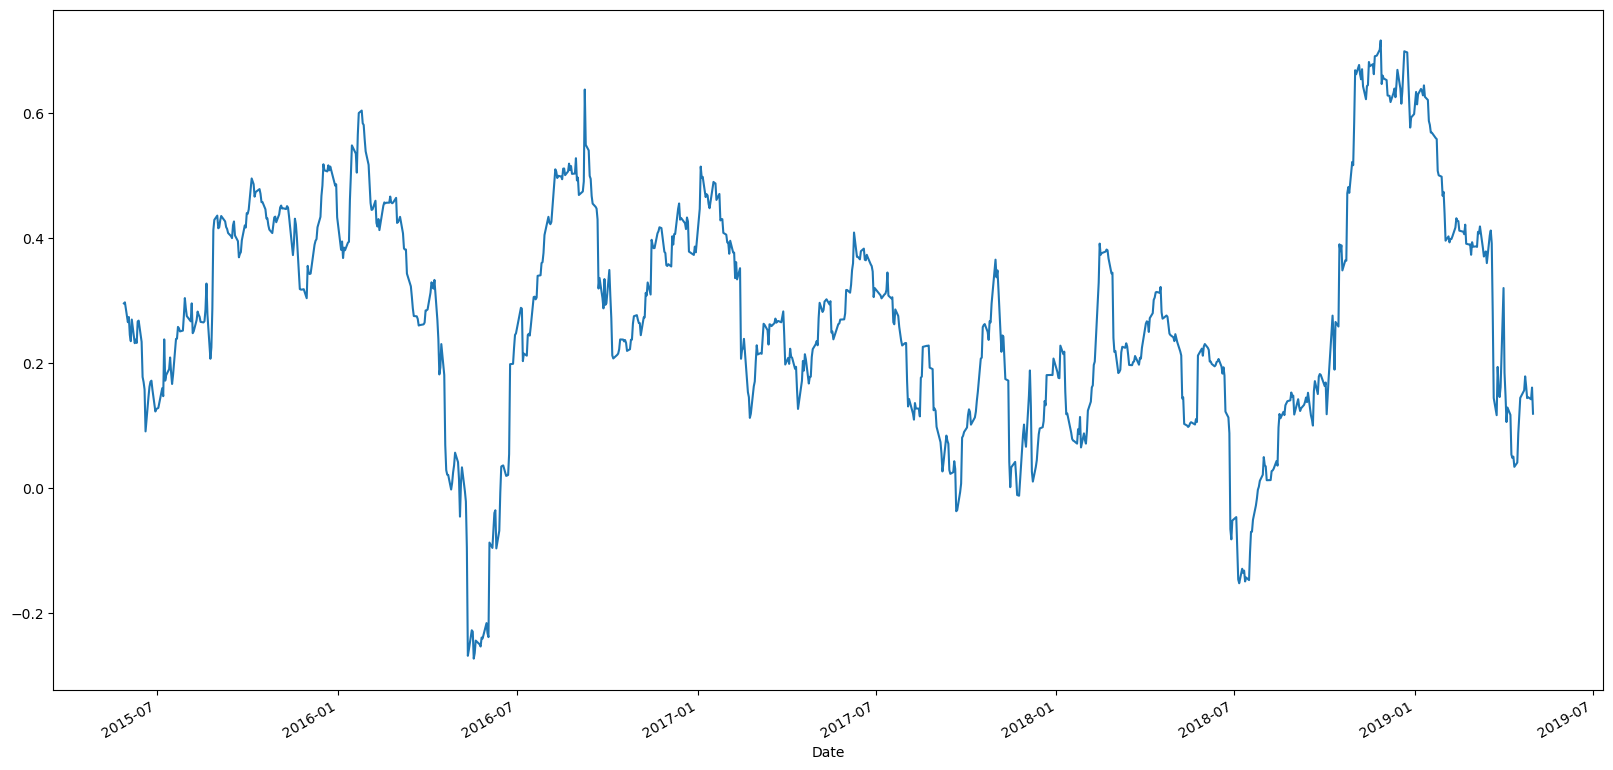

In [35]:
# Calculate covariance of a single portfolio (Chosen Algo 1)
covariance = total_df['Algo 1'].rolling(window=60).cov(total_df['S&P TSX'])

# Calculate variance of S&P TSX
variance = total_df['S&P TSX'].rolling(window=60).var()

# Computing beta
algo1_beta = covariance / variance

# Plot beta trend
algo1_beta.plot(figsize=(20,10))

## Rolling Statistics Challenge: Exponentially Weighted Average 

An alternative way to calculate a rolling window is to take the exponentially weighted moving average. This is like a moving window average, but it assigns greater importance to more recent observations. Try calculating the [`ewm`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.ewm.html) with a 21-day half life for each portfolio, using standard deviation (`std`) as the metric of interest.

In [36]:
# Use `ewm` to calculate the rolling window
expwtd_std = total_df.ewm(halflife=21).std()
expwtd_std

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,S&P TSX
Date,,,,,,,
2015-03-03,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2015-03-04,0.002472,0.005814,0.001441,0.007624,0.004700,0.002380,0.003648
2015-03-05,0.002677,0.004968,0.002478,0.007020,0.004162,0.002662,0.004936
2015-03-06,0.005349,0.004615,0.004665,0.009387,0.003419,0.007166,0.005205
2015-03-09,0.004638,0.004471,0.005496,0.008066,0.002999,0.006290,0.004517
...,...,...,...,...,...,...,...
2019-04-25,0.006819,0.006342,0.014811,0.010830,0.006526,0.007500,0.004700
2019-04-26,0.006819,0.006448,0.014764,0.010763,0.006433,0.007418,0.004628
2019-04-29,0.006708,0.006357,0.014575,0.010601,0.006378,0.007304,0.004564


---

# Sharpe Ratios
In reality, investment managers and thier institutional investors look at the ratio of return-to-risk, and not just returns alone. After all, if you could invest in one of two portfolios, and each offered the same 10% return, yet one offered lower risk, you'd take that one, right?

### Using the daily returns, calculate and visualize the Sharpe ratios using a bar plot

In [38]:
# Annualized Sharpe Ratios
sharpe_ratios = (total_df.mean() * 252) / (total_df.std()*np.sqrt(252))
print(f"Sharpe Ration for each Portfolio: \n{sharpe_ratios}")

Sharpe Ration for each Portfolio: 
SOROS FUND MANAGEMENT LLC      0.286709
PAULSON & CO.INC.             -0.547594
TIGER GLOBAL MANAGEMENT LLC   -0.144455
BERKSHIRE HATHAWAY INC         0.467045
Algo 1                         1.491514
Algo 2                         0.396817
S&P TSX                        0.195550
dtype: float64


<AxesSubplot:title={'center':'Sharpe Ratios'}>

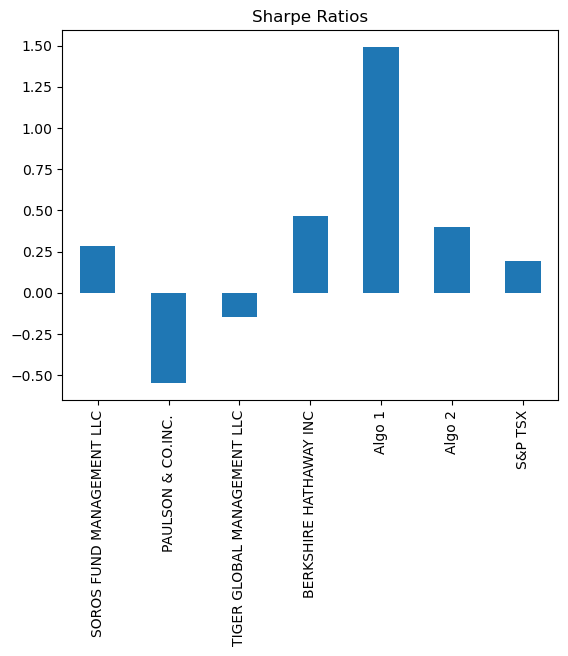

In [39]:
# Visualize the sharpe ratios as a bar plot
sharpe_ratios.plot(kind = "bar", title = "Sharpe Ratios")

### Determine whether the algorithmic strategies outperform both the market (S&P TSX 60) and the whales portfolios.

Write your answer here!

---

# Create Custom Portfolio

In this section, you will build your own portfolio of stocks, calculate the returns, and compare the results to the Whale Portfolios and the S&P TSX 60. 

1. Choose 3-5 custom stocks with at last 1 year's worth of historic prices and create a DataFrame of the closing prices and dates for each stock.
2. Calculate the weighted returns for the portfolio assuming an equal number of shares for each stock.
3. Join your portfolio returns to the DataFrame that contains all of the portfolio returns.
4. Re-run the performance and risk analysis with your portfolio to see how it compares to the others.
5. Include correlation analysis to determine which stocks (if any) are correlated.

## Choose 3-5 custom stocks with at last 1 year's worth of historic prices and create a DataFrame of the closing prices and dates for each stock.

In [40]:
# Reading data from 1st stock
l_path = Path("c:/Users/Aakshay Gautam/Desktop/Homework/Module4/Starter_Code/Resources/l_historical.csv")
lhistorical_df = pd.read_csv(l_path, index_col="Date", parse_dates=True, infer_datetime_format=True)
lhistorical_df.head()

,Symbol,Close
Date,,
2018-01-02,L,57.99
2018-01-03,L,57.41
2018-01-04,L,57.42
2018-01-05,L,57.42
2018-01-08,L,56.86


In [41]:
# Reading data from 2nd stock
otex_path = Path("c:/Users/Aakshay Gautam/Desktop/Homework/Module4/Starter_Code/Resources/otex_historical.csv")
otex_df = pd.read_csv(otex_path, index_col="Date", parse_dates=True, infer_datetime_format=True)
otex_df.head()

,Symbol,Close
Date,,
2018-01-02,OTEX,43.58
2018-01-03,OTEX,43.07
2018-01-04,OTEX,42.91
2018-01-05,OTEX,42.57
2018-01-08,OTEX,42.16


In [42]:
# Reading data from 3rd stock
shop_path = Path("c:/Users/Aakshay Gautam/Desktop/Homework/Module4/Starter_Code/Resources/shop_historical.csv")
shop_df = pd.read_csv(shop_path, index_col="Date", parse_dates=True, infer_datetime_format=True)
shop_df.head()

,Symbol,Close
Date,,
2018-01-02,SHOP,132.06
2018-01-03,SHOP,135.15
2018-01-04,SHOP,137.46
2018-01-05,SHOP,137.26
2018-01-08,SHOP,139.51


In [43]:
# Combine all stocks in a single DataFrame
combined_df = pd.concat([lhistorical_df, otex_df, shop_df], axis="columns", join="inner")
combined_df.head()

,Symbol,Close,Symbol,Close,Symbol,Close
Date,,,,,,
2018-01-02,L,57.99,OTEX,43.58,SHOP,132.06
2018-01-03,L,57.41,OTEX,43.07,SHOP,135.15
2018-01-04,L,57.42,OTEX,42.91,SHOP,137.46
2018-01-05,L,57.42,OTEX,42.57,SHOP,137.26
2018-01-08,L,56.86,OTEX,42.16,SHOP,139.51


In [44]:
# Reset Date index
combined_df = combined_df.reset_index()
combined_df.head()

,Date,Symbol,Close,Symbol,Close,Symbol,Close
0,2018-01-02,L,57.99,OTEX,43.58,SHOP,132.06
1,2018-01-03,L,57.41,OTEX,43.07,SHOP,135.15
2,2018-01-04,L,57.42,OTEX,42.91,SHOP,137.46
3,2018-01-05,L,57.42,OTEX,42.57,SHOP,137.26
4,2018-01-08,L,56.86,OTEX,42.16,SHOP,139.51


In [45]:
# Reorganize portfolio data by having a column per symbol - dropping unnecessary columns
combined_df = combined_df.drop(columns=["Symbol", "Symbol", "Symbol"])
combined_df.head()

,Date,Close,Close,Close
0,2018-01-02,57.99,43.58,132.06
1,2018-01-03,57.41,43.07,135.15
2,2018-01-04,57.42,42.91,137.46
3,2018-01-05,57.42,42.57,137.26
4,2018-01-08,56.86,42.16,139.51


In [46]:
# Drop the Symbol column
columns = ["Date", "L", "OTEX", "SHOP"]
combined_df.columns = columns
combined_df.head()

,Date,L,OTEX,SHOP
0,2018-01-02,57.99,43.58,132.06
1,2018-01-03,57.41,43.07,135.15
2,2018-01-04,57.42,42.91,137.46
3,2018-01-05,57.42,42.57,137.26
4,2018-01-08,56.86,42.16,139.51


In [47]:
#Better Presentation of Data
combined_df = combined_df.set_index("Date")
combined_df.head()

,L,OTEX,SHOP
Date,,,
2018-01-02,57.99,43.58,132.06
2018-01-03,57.41,43.07,135.15
2018-01-04,57.42,42.91,137.46
2018-01-05,57.42,42.57,137.26
2018-01-08,56.86,42.16,139.51


In [48]:
# Calculate daily returns
dailyreturns = combined_df.pct_change()

# Drop NAs
dailyreturns = dailyreturns.dropna()

# Display sample data
dailyreturns.head()

,L,OTEX,SHOP
Date,,,
2018-01-03,-0.010002,-0.011703,0.023398
2018-01-04,0.000174,-0.003715,0.017092
2018-01-05,0.000000,-0.007924,-0.001455
2018-01-08,-0.009753,-0.009631,0.016392
2018-01-09,0.008969,-0.000712,-0.011254


## Calculate the weighted returns for the portfolio assuming an equal number of shares for each stock

In [49]:
# Set weights
weights = [1/3, 1/3, 1/3]

# Calculate portfolio return
portfolioreturns = dailyreturns.dot(weights)

# Display sample data
portfolioreturns.head()

Date
2018-01-03    0.000565
2018-01-04    0.004517
2018-01-05   -0.003126
2018-01-08   -0.000997
2018-01-09   -0.000999
dtype: float64

## Join your portfolio returns to the DataFrame that contains all of the portfolio returns

In [50]:
# Join your returns DataFrame to the original returns DataFrame
final_portfolio = pd.concat([total_df, portfolioreturns], axis="columns", join="inner")
final_portfolio = final_portfolio.rename(columns={0:"Final Portfolio"})
final_portfolio.head()


,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,S&P TSX,Final Portfolio
Date,,,,,,,,
2018-01-03,0.004658,0.000027,0.001979,0.005676,-0.000890,0.008175,0.003774,0.000565
2018-01-04,-0.000914,0.004196,0.010743,0.004065,-0.000914,0.004294,0.002528,0.004517
2018-01-05,0.004072,0.000823,0.000737,0.022023,-0.003839,0.006405,-0.003869,-0.003126
2018-01-08,0.004473,-0.003739,0.005085,0.003435,0.001653,0.000658,-0.001944,-0.000997
2018-01-09,-0.001028,0.000872,0.001789,0.000708,-0.001004,-0.002091,0.000097,-0.000999


In [51]:
# Only compare dates where return data exists for all the stocks (drop NaNs)
final_portfolio = final_portfolio.dropna().copy()
final_portfolio.head()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,S&P TSX,Final Portfolio
Date,,,,,,,,
2018-01-03,0.004658,0.000027,0.001979,0.005676,-0.000890,0.008175,0.003774,0.000565
2018-01-04,-0.000914,0.004196,0.010743,0.004065,-0.000914,0.004294,0.002528,0.004517
2018-01-05,0.004072,0.000823,0.000737,0.022023,-0.003839,0.006405,-0.003869,-0.003126
2018-01-08,0.004473,-0.003739,0.005085,0.003435,0.001653,0.000658,-0.001944,-0.000997
2018-01-09,-0.001028,0.000872,0.001789,0.000708,-0.001004,-0.002091,0.000097,-0.000999


## Re-run the risk analysis with your portfolio to see how it compares to the others

### Calculate the Annualized Standard Deviation

In [52]:
# Calculate the annualized `std`
final_portfolio_std = final_portfolio.std().sort_values(ascending=True)
final_portfolio_std.head()

S&P TSX                      0.006244
PAULSON & CO.INC.            0.007203
Algo 1                       0.007561
Algo 2                       0.008672
SOROS FUND MANAGEMENT LLC    0.009177
dtype: float64

In [53]:
yearlyfinal_portfolio_std = final_portfolio_std*np.sqrt(252)
print(f"Annualized Standard Deviation: \n{final_portfolio_std} ")

Annualized Standard Deviation: 
S&P TSX                        0.006244
PAULSON & CO.INC.              0.007203
Algo 1                         0.007561
Algo 2                         0.008672
SOROS FUND MANAGEMENT LLC      0.009177
TIGER GLOBAL MANAGEMENT LLC    0.013848
Final Portfolio                0.014132
BERKSHIRE HATHAWAY INC         0.014328
dtype: float64 


### Calculate and plot rolling `std` with 21-day window

<AxesSubplot:xlabel='Date'>

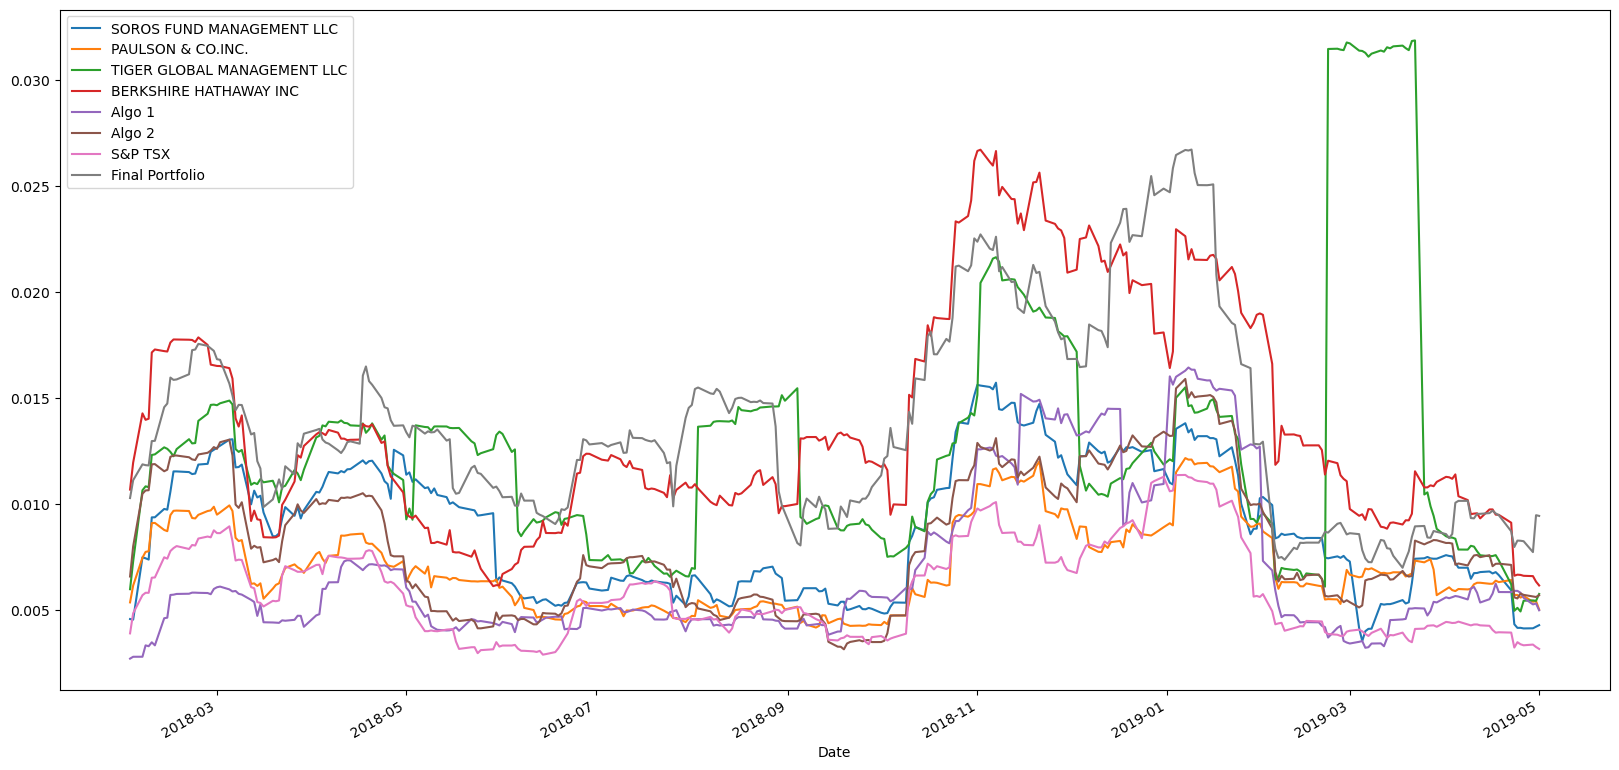

In [63]:
# Calculate rolling standard deviation


# Plot rolling standard deviation
final_portfolio.rolling(window=21).std().plot(figsize=(20,10))


### Calculate and plot the correlation

In [55]:
# Calculation
finalportfolio_correlation = final_portfolio.corr()
finalportfolio_correlation


,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,S&P TSX,Final Portfolio
SOROS FUND MANAGEMENT LLC,1.000000,0.764174,0.526710,0.782414,0.305525,0.834431,0.686681,0.556093
PAULSON & CO.INC.,0.764174,1.000000,0.536534,0.647407,0.320568,0.797494,0.623728,0.385305
TIGER GLOBAL MANAGEMENT LLC,0.526710,0.536534,1.000000,0.384316,0.130845,0.485258,0.438781,0.303971
BERKSHIRE HATHAWAY INC,0.782414,0.647407,0.384316,1.000000,0.294696,0.783254,0.649817,0.647413
Algo 1,0.305525,0.320568,0.130845,0.294696,1.000000,0.321837,0.284789,0.214770
Algo 2,0.834431,0.797494,0.485258,0.783254,0.321837,1.000000,0.754326,0.563756
S&P TSX,0.686681,0.623728,0.438781,0.649817,0.284789,0.754326,1.000000,0.579228
Final Portfolio,0.556093,0.385305,0.303971,0.647413,0.214770,0.563756,0.579228,1.000000


<AxesSubplot:>

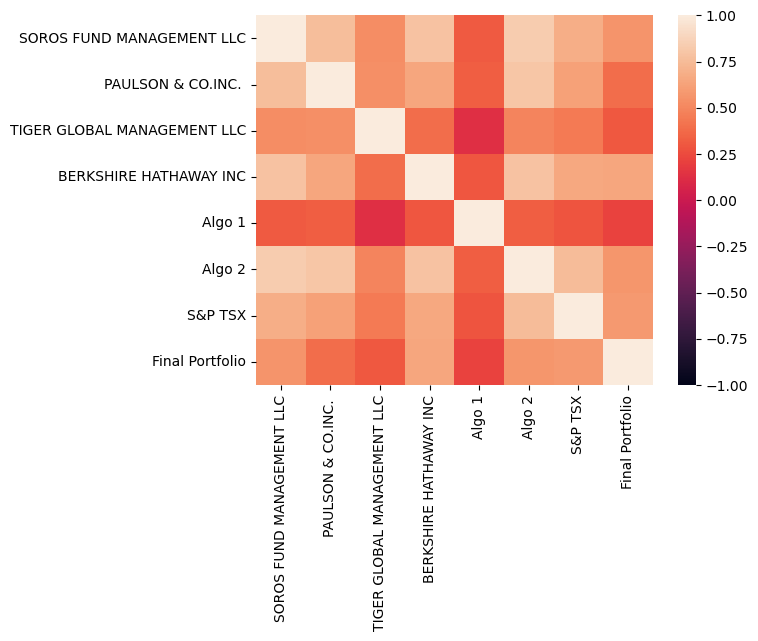

In [56]:
# Plotting
sns.heatmap(finalportfolio_correlation, vmin=-1, vmax=1)

### Calculate and Plot the 60-day Rolling Beta for Your Portfolio compared to the S&P 60 TSX

In [57]:
# S&P TSX Variance
sp_variance = final_portfolio["S&P TSX"].var()

In [58]:
# Final Portfolio Covariance
final_covariance = final_portfolio["Final Portfolio"].cov(final_portfolio["S&P TSX"])

In [59]:
# Calculating Beta
final_beta = final_covariance / sp_variance

<AxesSubplot:xlabel='Date'>

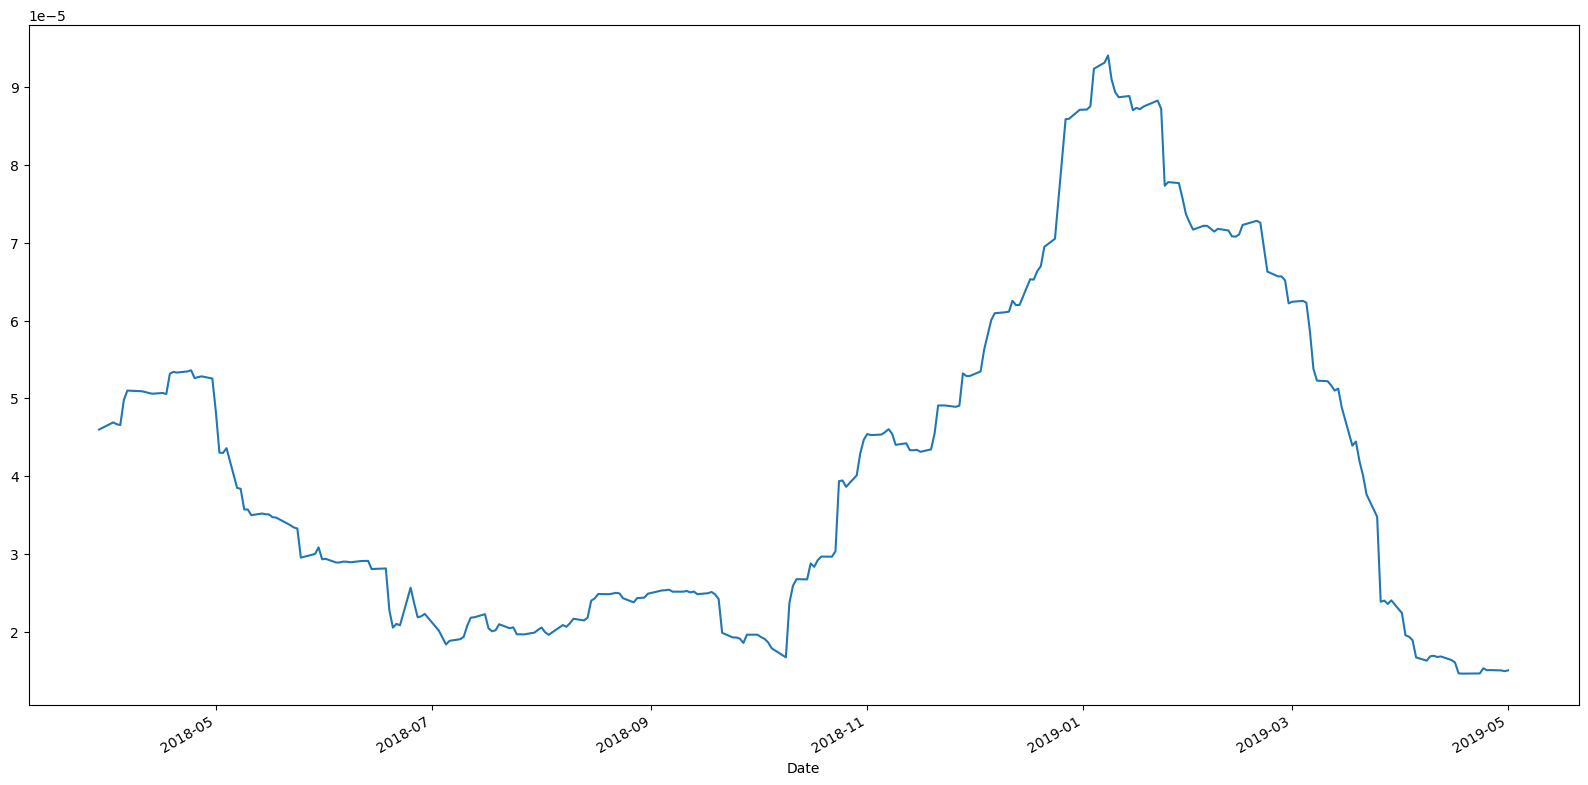

In [60]:
# Plotting Beta
rolling_covariance = final_portfolio["Final Portfolio"].rolling(window=60).cov(final_portfolio["S&P TSX"])
rolling_sp_variance = final_portfolio["S&P TSX"].rolling(window=60).var()
rolling_final_beta = rolling_covariance/rolling_sp_variance
rolling_sp_variance.plot(figsize=(20,10))


### Using the daily returns, calculate and visualize the Sharpe ratios using a bar plot

In [61]:
# Calculate Annualized Sharpe Ratios
final_sharpe_ratios = ((final_portfolio.mean()*252)/(final_portfolio.std()*np.sqrt(252)))
print (f"The Sharpe Ratios are: \n{final_sharpe_ratios}")

The Sharpe Ratios are: 
SOROS FUND MANAGEMENT LLC     -0.088196
PAULSON & CO.INC.             -0.396282
TIGER GLOBAL MANAGEMENT LLC   -1.391612
BERKSHIRE HATHAWAY INC         0.195907
Algo 1                         1.901461
Algo 2                         0.021394
S&P TSX                        0.034651
Final Portfolio                1.564547
dtype: float64


<AxesSubplot:title={'center':'Final Sharpe Ratios'}>

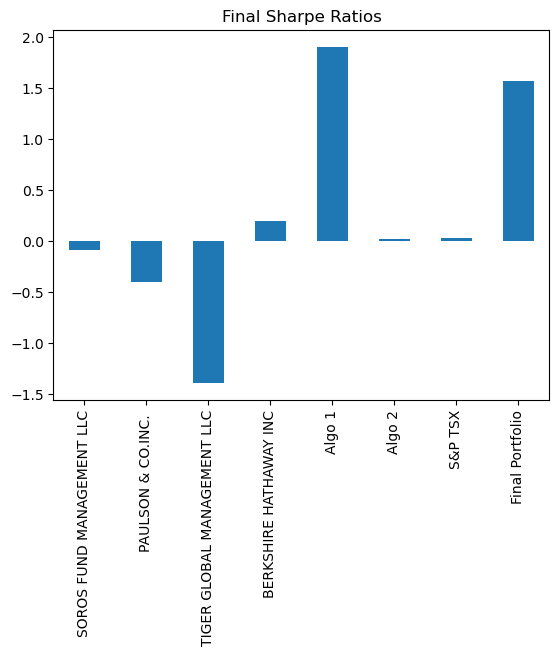

In [62]:
# Visualize the sharpe ratios as a bar plot
final_sharpe_ratios.plot.bar(title = "Final Sharpe Ratios")

### How does your portfolio do?

Write your answer here!

In [ ]:
# The Custom Portfolio outperforms the S&P 60 TSX Index and all the other portfolios except for Algo 1.
# Algo 1 ouperforms all the portfolios.